In [2]:
import pandas as pd
import os 
import numpy as np
import scipy as sp
import scipy.stats as stats
import Bio
import rpy2
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


# Preliminary visualization

# THIS FILE MOVED OVER from pipeline1 
"scater/cell_phase_normd.rds"

In [28]:
%%R

###
library(SingleCellExperiment)
library(scater)
library(destiny)
options(stringsAsFactors = FALSE)
###readin
scdata <- readRDS("scater/cell_phase_normd.rds")

/home/johnny/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: 
Attaching package: ‘destiny’


  warnings.warn(x, RRuntimeWarning)
/home/johnny/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: The following object is masked from ‘package:SummarizedExperiment’:

    distance


  warnings.warn(x, RRuntimeWarning)
/home/johnny/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: The following object is masked from ‘package:GenomicRanges’:

    distance


  warnings.warn(x, RRuntimeWarning)
/home/johnny/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: The following object is masked from ‘package:IRanges’:

    distance


  warnings.warn(x, RRuntimeWarning)


# Generate plot coordinates in SCE object

In [3]:
%%R

######################
####calculate coordinates for different plot types
scdata <- runDiffusionMap(scdata,exprs_values = "logcounts")
scdata <- runTSNE(scdata,exprs_values='logcounts',perplexity = 30,rand_seed = 123456)
scdata <- runPCA(scdata,exprs_values='logcounts')


Error in runMDS(scdata, exprs_values = "logcounts") : 
  could not find function "runMDS"


/home/johnny/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Error in runMDS(scdata, exprs_values = "logcounts") : 
  could not find function "runMDS"

  warnings.warn(x, RRuntimeWarning)


# THIS FILE MOVED OVER TO PIPELINE 1 FOR processing
"scater/ready_for_clustering.rds"

In [4]:
%%R

###save file
saveRDS(scdata, file = "scater/ready_for_clustering.rds")

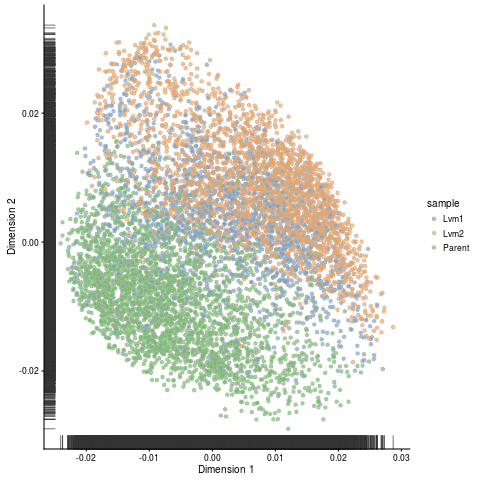

In [15]:
%%R

plotDiffusionMap(
    scdata,
    colour_by = "sample",
    alpha=0.05,
    jitter="jitter",
)

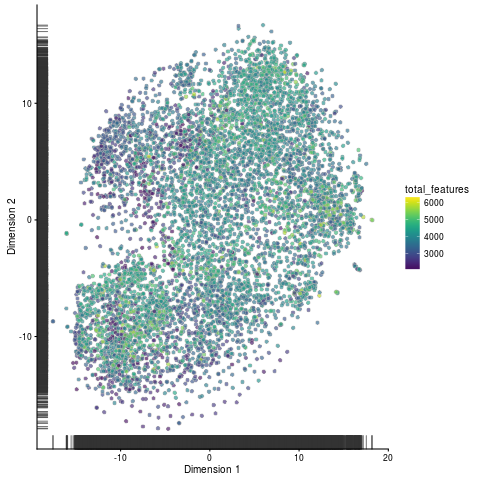

In [22]:
%%R

plotTSNE(
    scdata,
    colour_by = "total_features",
    alpha=0.05,
    jitter="jitter"
)

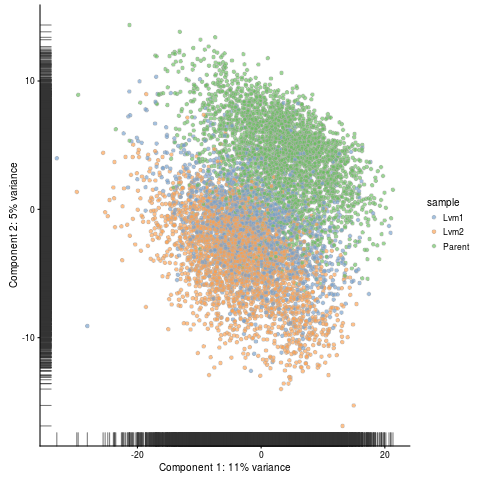

In [19]:
%%R

plotPCA(
    scdata,
    colour_by = "sample"
)

# Post-Clustering Visualization ; preliminary

# THIS FILE MOVED OVER from pipeline1 
"scater/sc3_clustered.rds"

In [2]:
%%R

###
library(SingleCellExperiment)
library(scater)
library(SC3)
options(stringsAsFactors = FALSE)
###readin
scdata <- readRDS("scater/sc3_clustered.rds")

/home/johnny/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: SummarizedExperiment

  warnings.warn(x, RRuntimeWarning)
/home/johnny/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: GenomicRanges

  warnings.warn(x, RRuntimeWarning)
/home/johnny/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: stats4

  warnings.warn(x, RRuntimeWarning)
/home/johnny/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: BiocGenerics

  warnings.warn(x, RRuntimeWarning)
/home/johnny/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: parallel

  warnings.warn(x, RRuntimeWarning)
/home/johnny/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: 
Attaching pack

[1] "k = 3-20"


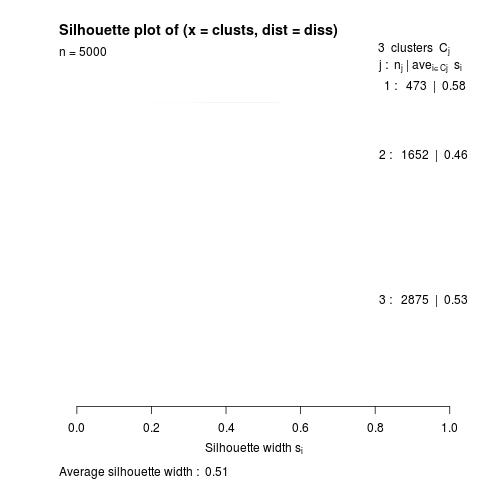

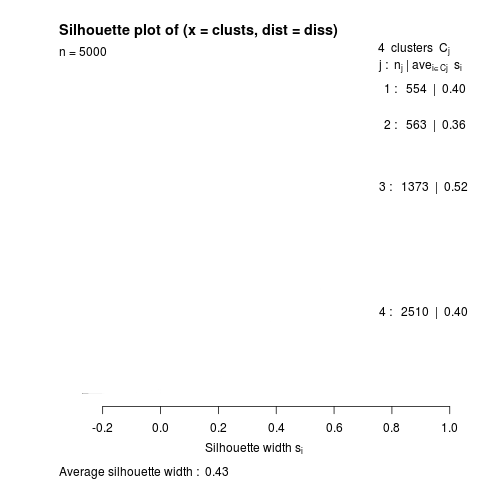

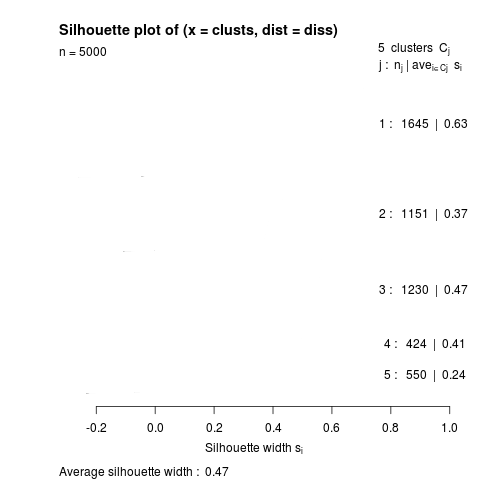

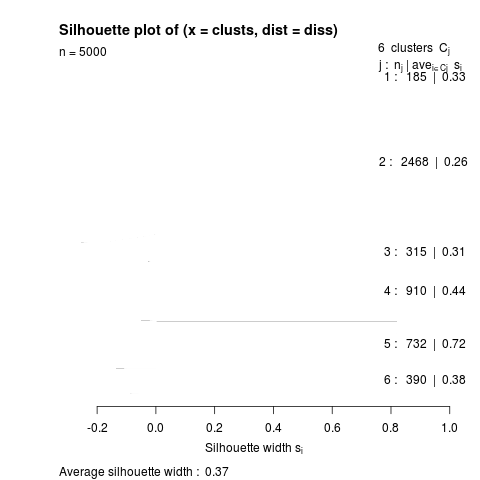

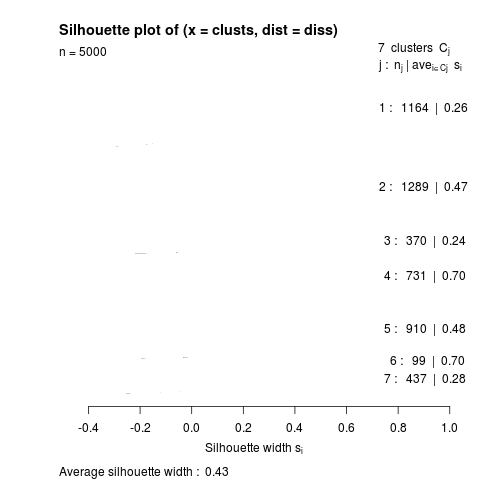

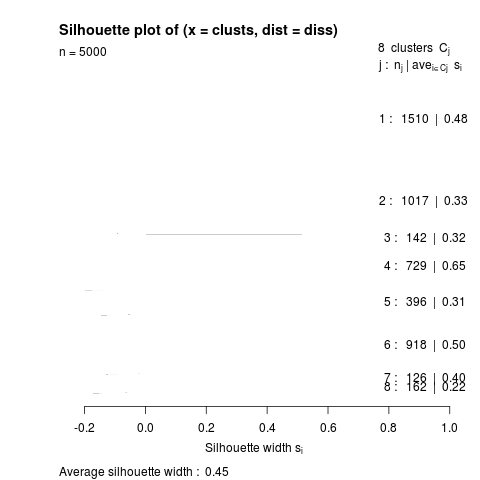

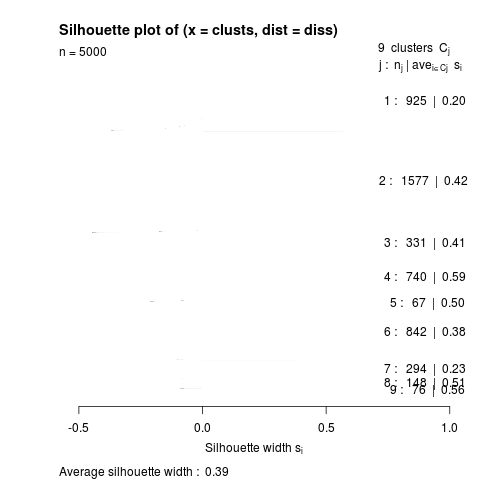

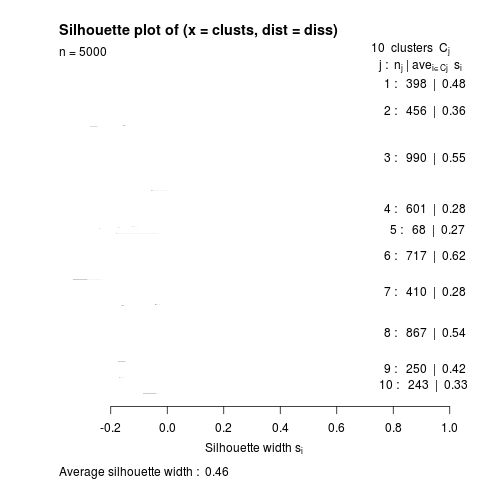

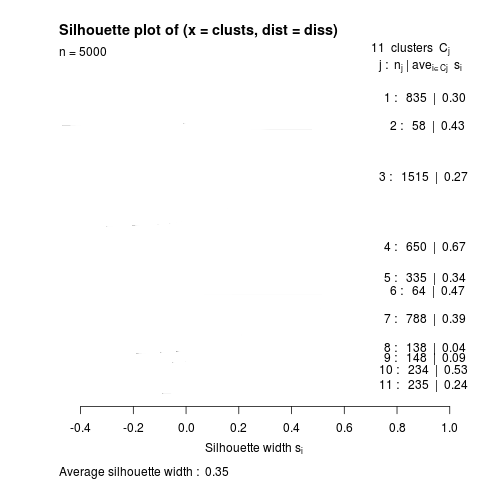

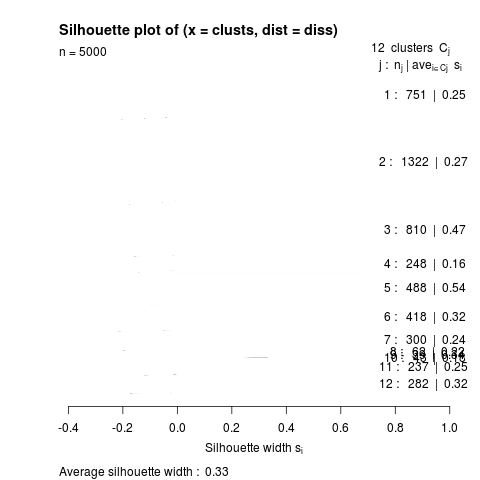

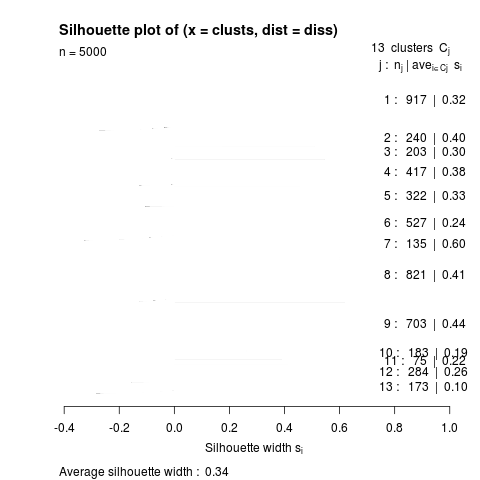

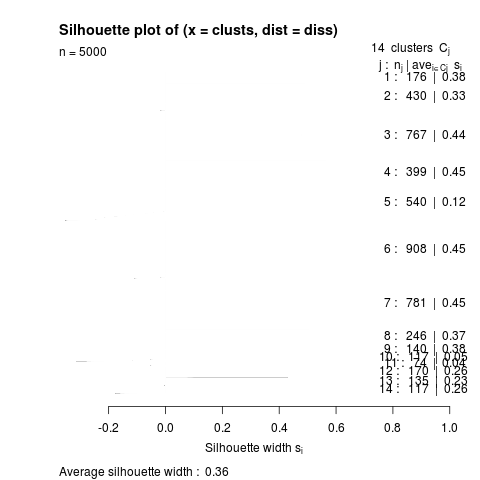

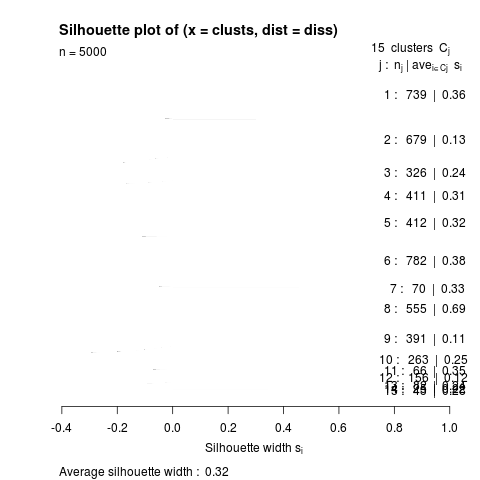

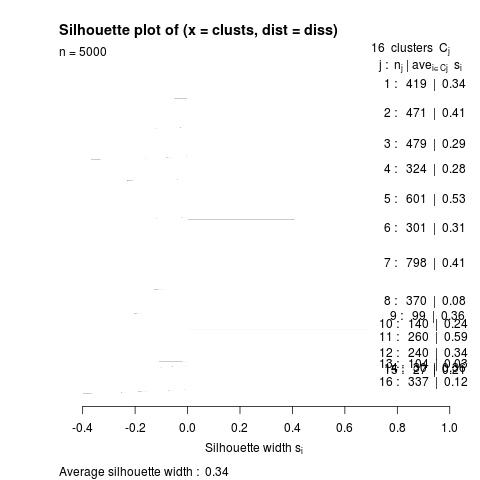

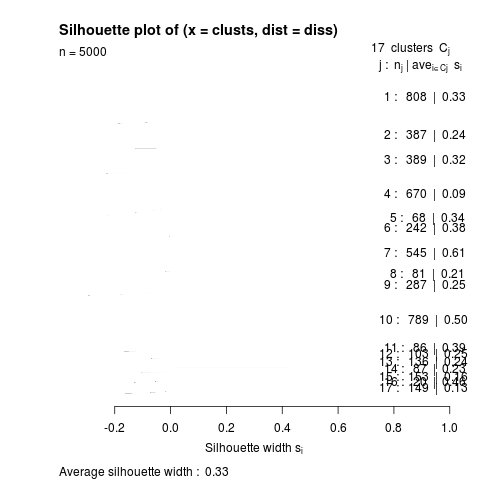

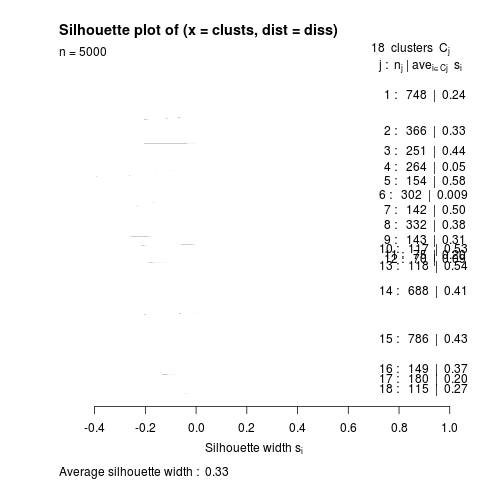

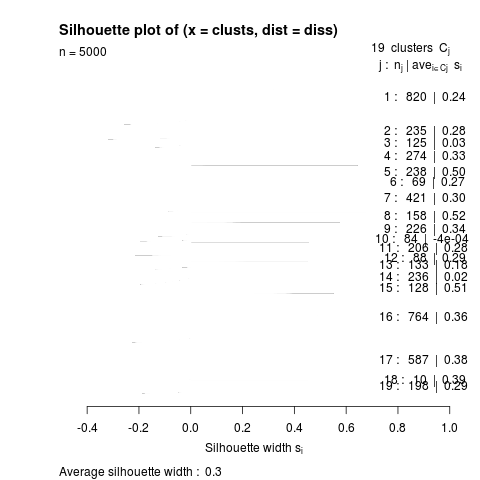

In [12]:
%%R

print("k = 3-20")
for (i in 3:19){
    sc3_plot_silhouette(scdata,k=i)
}


Visualize 10 clusters

In [3]:
%%R

###subset by not NA
scdata.qc <- scdata[ , !is.na(colData(scdata)$sc3_10_clusters)]
####calculate coordinates for different plot types
scdata.qc <- runDiffusionMap(scdata.qc,exprs_values = "logcounts")
scdata.qc <- runTSNE(scdata.qc,exprs_values='logcounts',perplexity = 40,rand_seed = 123456)
scdata.qc <- runPCA(scdata.qc,exprs_values='logcounts')
###save file
saveRDS(scdata.qc, file = "scater/sc3_clustered_vis.rds")

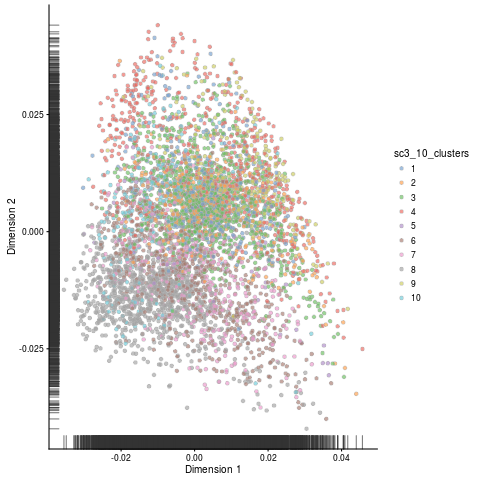

In [4]:
%%R

plotDiffusionMap(
    scdata.qc,
    colour_by = "sc3_10_clusters",
)

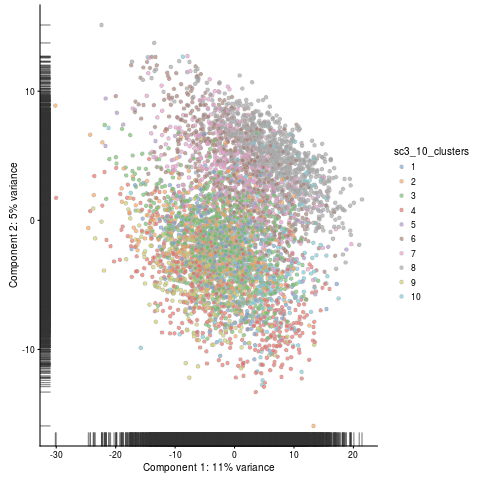

In [5]:
%%R

plotPCA(
    scdata.qc,
    colour_by = "sc3_10_clusters"
)

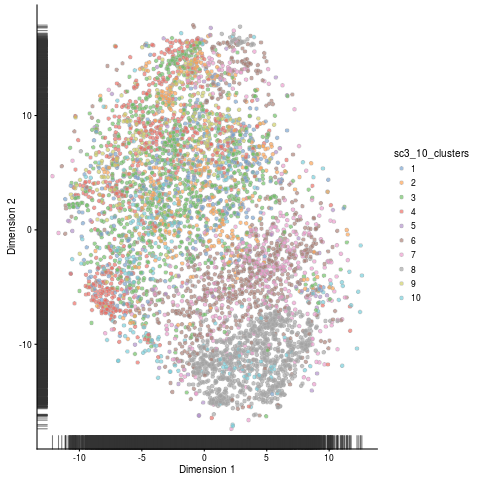

In [6]:
%%R

plotTSNE(
    scdata.qc,
    colour_by = "sc3_10_clusters",
)

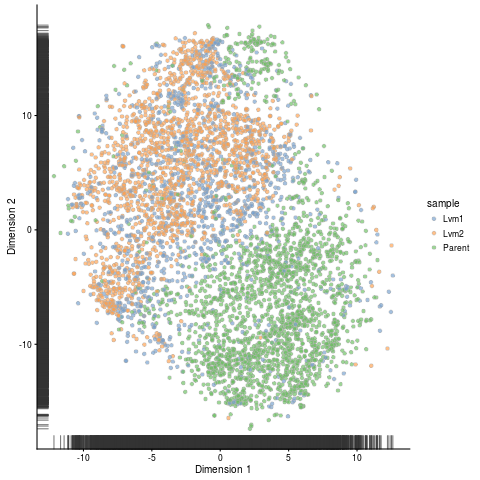

In [7]:
%%R


plotTSNE(
    scdata.qc,
    colour_by = "sample",
)

Reclustered from 20-40 = k

# THIS FILE MOVED OVER from pipeline1 
"scater/sc3_clustered_20to40.rds"

In [18]:
%%R

###
library(SingleCellExperiment)
library(scater)
library(SC3)
options(stringsAsFactors = FALSE)
###readin
scdata_many <- readRDS("scater/sc3_clustered_20to40.rds")

visualize 35 clusters

In [19]:
%%R

###subset by not NA
scdata_many.qc <- scdata_many[ , !is.na(colData(scdata_many)$sc3_35_clusters)]
####calculate coordinates for different plot types
scdata_many.qc <- runDiffusionMap(scdata_many.qc,exprs_values = "logcounts",rerun=TRUE)
scdata_many.qc <- runTSNE(scdata_many.qc,exprs_values='logcounts',perplexity = 30,rand_seed = 123456,rerun=TRUE)
scdata_many.qc <- runPCA(scdata_many.qc,exprs_values='logcounts',rerun=TRUE)
###save file
saveRDS(scdata_many.qc, file = "scater/sc3_clustered_20to40_vis.rds")


Error: length(list(...)) == 0L is not TRUE


# Post clustering visualization of gene expression


In [12]:
%%R

###
library(SingleCellExperiment)
library(scater)
library(SC3)
options(stringsAsFactors = FALSE)
###readin
scdata <- readRDS("scater/sc3_clustered.rds")

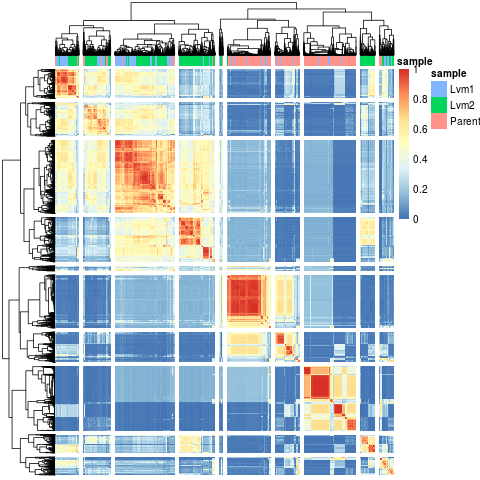

In [13]:
%%R

sc3_plot_consensus(scdata, k = 10, show_pdata = "sample")

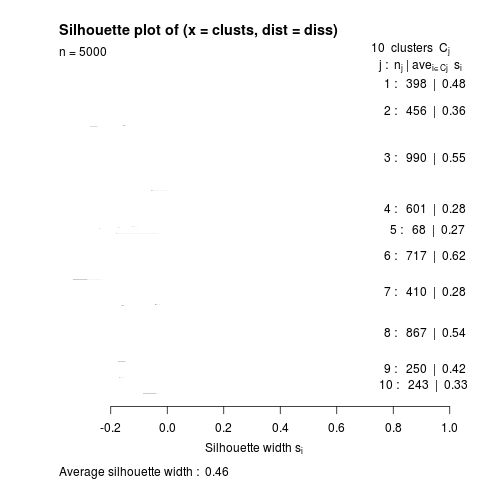

In [8]:
%%R

sc3_plot_silhouette(scdata, k = 10)

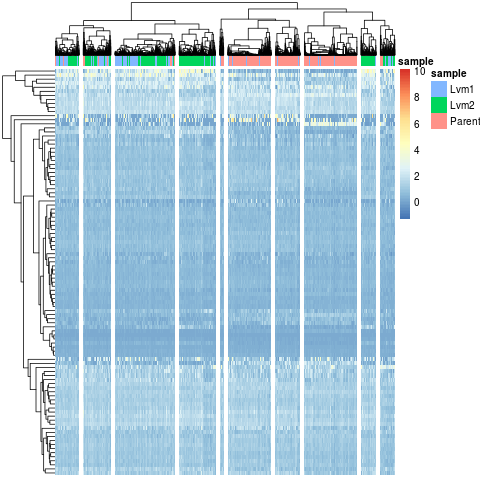

In [14]:
%%R

sc3_plot_expression(scdata, k = 10, show_pdata = "sample")

In [10]:
%%R

#####saving plots for 10 clusters
sc3_3 <- plotPCA(scdata, colour_by = "sc3_10_clusters")

###save picture
pdf("sc3_10_clusters_pca_1.pdf")
plot(sc3_3)
dev.off()

sc3_3 <- plotPCA(scdata, colour_by = "sc3_10_clusters", shape_by = "sample")

###save picture
pdf("sc3_10_clusters_pca_0.pdf")
plot(sc3_3)
dev.off()

sc3_3 <- plotTSNE(
    scdata, 
    perplexity = 5, 
    rand_seed = 123456, 
    return_SCE=FALSE, 
    colour_by = "sc3_10_clusters"
)

###save picture
pdf("sc3_10_clusters_tsne_1.pdf")
plot(sc3_3)
dev.off()

sc3_3 <- plotTSNE(
    scdata, 
    perplexity = 5, 
    rand_seed = 123456, 
    return_SCE=FALSE, 
    colour_by = "sc3_10_clusters", 
    shape_by = "sample"
)

###save picture
pdf("sc3_10_clusters_tsne_2.pdf")
plot(sc3_3)
dev.off()

png 
  2 


# Get variable genes used in clustering

In [4]:
%%R

###
library(SingleCellExperiment)
library(scater)
library(SC3)
options(stringsAsFactors = FALSE)
###readin
scdata <- readRDS("scater/sc3_clustered.rds")

In [15]:
%%R
#####subset in preparation for separate clustering
P <- scdata[ , colData(scdata)$sample == "Parent"]
LVM1 <- scdata[ , colData(scdata)$sample == "Lvm1"]
LVM2 <- scdata[ , colData(scdata)$sample == "Lvm2"]

In [16]:
%%R
#####run TSNE separately
P <- runTSNE(P,exprs_values='logcounts',perplexity = 40,rand_seed = 10000)
LVM1 <- runTSNE(LVM1,exprs_values='logcounts',perplexity = 40,rand_seed = 10000)
LVM2 <- runTSNE(LVM2,exprs_values='logcounts',perplexity = 40,rand_seed = 10000)

In [20]:
%%R
#####subset by not NA
P <- P[ , !is.na(colData(P)$sc3_10_clusters)]
LVM1 <- LVM1[ , !is.na(colData(LVM1)$sc3_10_clusters)]
LVM2 <- LVM2[ , !is.na(colData(LVM2)$sc3_10_clusters)]

In [21]:
%%R
#####save files
saveRDS(P, file = "scater/sc3_separate_clustered_P.rds")
saveRDS(LVM1, file = "scater/sc3_separate_clustered_LVM1.rds")
saveRDS(LVM2, file = "scater/sc3_separate_clustered_LVM2.rds")

plot clusters:
8 - parent
10 - LVM1
9 - LVM2 

# Visualize clusters and marker genes

In [ ]:
%%R

###
library(SingleCellExperiment)
library(scater)
library(SC3)
options(stringsAsFactors = FALSE)
###readin
P <- readRDS("scater/sc3_separate_clustered_P.rds")
LVM1 <- readRDS("scater/sc3_separate_clustered_LVM1.rds")
LVM2 <- readRDS("scater/sc3_separate_clustered_LVM2.rds")

/home/johnny/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: SummarizedExperiment

  warnings.warn(x, RRuntimeWarning)
/home/johnny/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: GenomicRanges

  warnings.warn(x, RRuntimeWarning)
/home/johnny/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: stats4

  warnings.warn(x, RRuntimeWarning)
/home/johnny/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: BiocGenerics

  warnings.warn(x, RRuntimeWarning)
/home/johnny/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: parallel

  warnings.warn(x, RRuntimeWarning)
/home/johnny/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: 
Attaching pack

In [ ]:
%%R
####define visualization cluster
vis_cluster <- 8
####read into object
tmp <- colData(P)$sc3_10_clusters
tmp <- (tmp == vis_cluster)
colData(P)$vis_clust <- tmp
####plot
plotTSNE(
    P,
    colour_by = "vis_clust",
) + ggtitle(paste("cluster",toString(vis_cluster),sep=" ")) + scale_fill_manual(values=c("FALSE"="blue", "TRUE"="red"))

In [ ]:
%%R
####define visualization cluster
vis_cluster <- 10
####read into object
tmp <- colData(LVM1)$sc3_10_clusters
tmp <- (tmp == vis_cluster)
colData(LVM1)$vis_clust <- tmp
####plot
plotTSNE(
    LVM1,
    colour_by = "vis_clust",
) + ggtitle(paste("cluster",toString(vis_cluster),sep=" ")) + scale_fill_manual(values=c("FALSE"="blue", "TRUE"="red"))

In [ ]:
%%R
####define visualization cluster
vis_cluster <- 9
####read into object
tmp <- colData(LVM2)$sc3_10_clusters
tmp <- (tmp == vis_cluster)
colData(LVM2)$vis_clust <- tmp
####plot
plotTSNE(
    LVM2,
    colour_by = "vis_clust",
) + ggtitle(paste("cluster",toString(vis_cluster),sep=" ")) + scale_fill_manual(values=c("FALSE"="blue", "TRUE"="red"))

plot marker gene for cluster 9

In [ ]:
%%R
####define gene to look at 
gene = "ENSG00000119943"

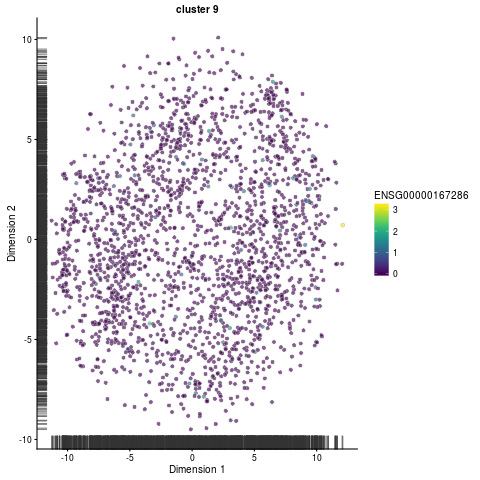

In [22]:
%%R
####plot
plotTSNE(
    P,
    colour_by = gene
) + ggtitle("Parental") 

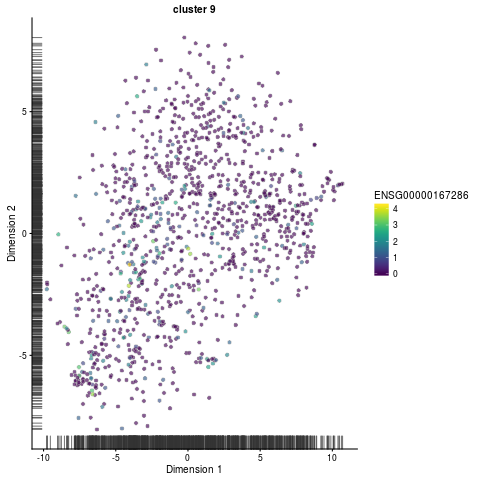

In [20]:
%%R
####plot
plotTSNE(
    LVM1,
    colour_by = gene
) + ggtitle("LVM1") 

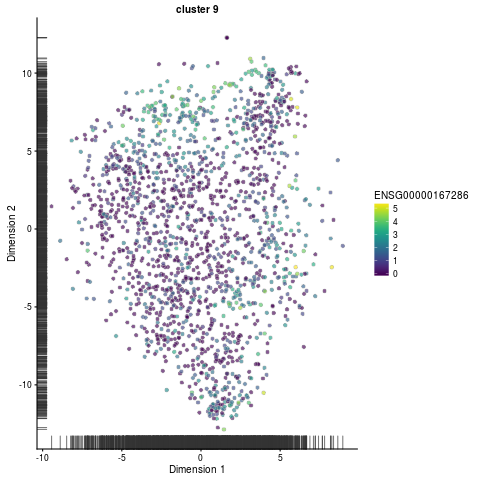

In [21]:
%%R
####plot
plotTSNE(
    LVM2,
    colour_by = gene
) + ggtitle("LVM2") 

# ##marker genes did not identify clusters well within the total datasets clustering

# Visualize datasets clustered separately (P, LVM1, LVM2)

# THIS FILE MOVED OVER from pipeline1 
### "scater/separately_clustered/sc3_clustered_P.rds" 
### "scater/separately_clustered/sc3_clustered_LVM1.rds"
### "scater/separately_clustered/sc3_clustered_LVM2.rds"

In [3]:
%%R

###
library(SingleCellExperiment)
library(scater)
library(SC3)
options(stringsAsFactors = FALSE)
library(gridExtra)
library(grid)
###readin
P <- readRDS("scater/separately_clustered/sc3_clustered_P.rds")
LVM1 <- readRDS("scater/separately_clustered/sc3_clustered_LVM1.rds")
LVM2 <- readRDS("scater/separately_clustered/sc3_clustered_LVM2.rds")

/home/johnny/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: SummarizedExperiment

  warnings.warn(x, RRuntimeWarning)
/home/johnny/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: GenomicRanges

  warnings.warn(x, RRuntimeWarning)
/home/johnny/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: stats4

  warnings.warn(x, RRuntimeWarning)
/home/johnny/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: BiocGenerics

  warnings.warn(x, RRuntimeWarning)
/home/johnny/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: parallel

  warnings.warn(x, RRuntimeWarning)
/home/johnny/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: 
Attaching pack

Evaluate Perplexity
run TSNE separately; check perplexity values of 50, 30, 15, 5

In [4]:
%%R
###checking value of 50 
perplex = 50
P <- runTSNE(P,exprs_values='logcounts',perplexity = perplex,rand_seed = 10000)
LVM1 <- runTSNE(LVM1,exprs_values='logcounts',perplexity = perplex,rand_seed = 10000)
LVM2 <- runTSNE(LVM2,exprs_values='logcounts',perplexity = perplex,rand_seed = 10000)

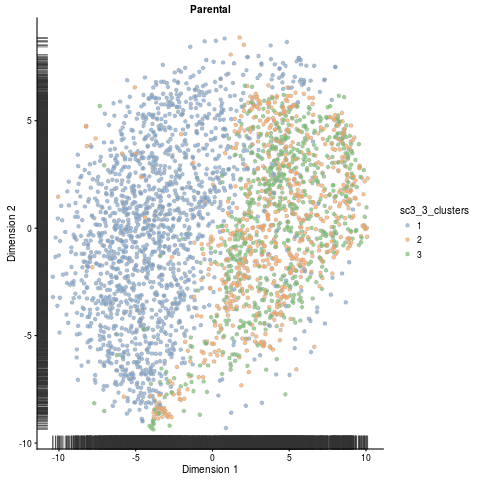

In [9]:
%%R
####plot
plotTSNE(
    P,
    colour_by = "sc3_3_clusters"
) + ggtitle("Parental") 

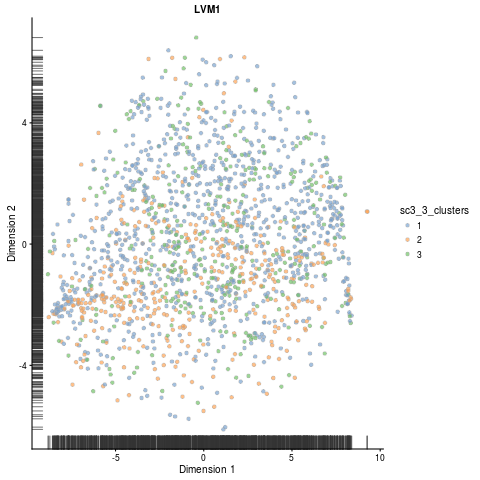

In [10]:
%%R
####plot
plotTSNE(
    LVM1,
    colour_by = "sc3_3_clusters"
) + ggtitle("LVM1") 

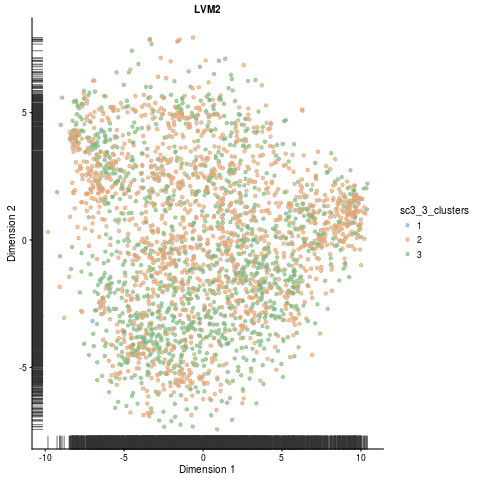

In [11]:
%%R
####plot
plotTSNE(
    LVM2,
    colour_by = "sc3_3_clusters"
) + ggtitle("LVM2") 

now checking 30

In [ ]:
%%R
###checking value of 30
perplex = 30
P <- runTSNE(P,exprs_values='logcounts',perplexity = perplex,rand_seed = 10000)
LVM1 <- runTSNE(LVM1,exprs_values='logcounts',perplexity = perplex,rand_seed = 10000)
LVM2 <- runTSNE(LVM2,exprs_values='logcounts',perplexity = perplex,rand_seed = 10000)

In [ ]:
%%R
####plot
plotTSNE(
    P,
    colour_by = "sc3_3_clusters"
) + ggtitle("Parental") 

In [ ]:
%%R
####plot
plotTSNE(
    LVM1,
    colour_by = "sc3_3_clusters"
) + ggtitle("LVM1") 

In [ ]:
%%R
####plot
plotTSNE(
    LVM2,
    colour_by = "sc3_3_clusters"
) + ggtitle("LVM2") 

now checking 15

In [ ]:
%%R
###checking value of 15
perplex = 15
P <- runTSNE(P,exprs_values='logcounts',perplexity = perplex,rand_seed = 10000)
LVM1 <- runTSNE(LVM1,exprs_values='logcounts',perplexity = perplex,rand_seed = 10000)
LVM2 <- runTSNE(LVM2,exprs_values='logcounts',perplexity = perplex,rand_seed = 10000)

In [ ]:
%%R
####plot
plotTSNE(
    P,
    colour_by = "sc3_3_clusters"
) + ggtitle("Parental") 

In [ ]:
%%R
####plot
plotTSNE(
    LVM1,
    colour_by = "sc3_3_clusters"
) + ggtitle("LVM1") 

In [ ]:
%%R
####plot
plotTSNE(
    LVM2,
    colour_by = "sc3_3_clusters"
) + ggtitle("LVM2") 

now checking 5

In [ ]:
%%R
###checking value of 5
perplex = 5
P <- runTSNE(P,exprs_values='logcounts',perplexity = perplex,rand_seed = 10000)
LVM1 <- runTSNE(LVM1,exprs_values='logcounts',perplexity = perplex,rand_seed = 10000)
LVM2 <- runTSNE(LVM2,exprs_values='logcounts',perplexity = perplex,rand_seed = 10000)

In [ ]:
%%R
####plot
plotTSNE(
    P,
    colour_by = "sc3_3_clusters"
) + ggtitle("Parental") 

In [ ]:
%%R
####plot
plotTSNE(
    LVM1,
    colour_by = "sc3_3_clusters"
) + ggtitle("LVM1") 

In [ ]:
%%R
####plot
plotTSNE(
    LVM2,
    colour_by = "sc3_3_clusters"
) + ggtitle("LVM2") 

plot silhouettes to see best cluster number

###Parental

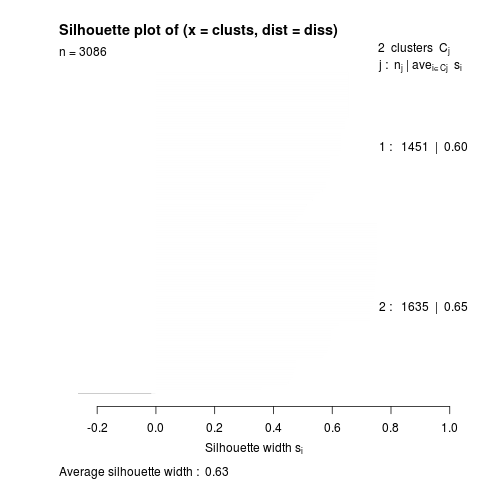

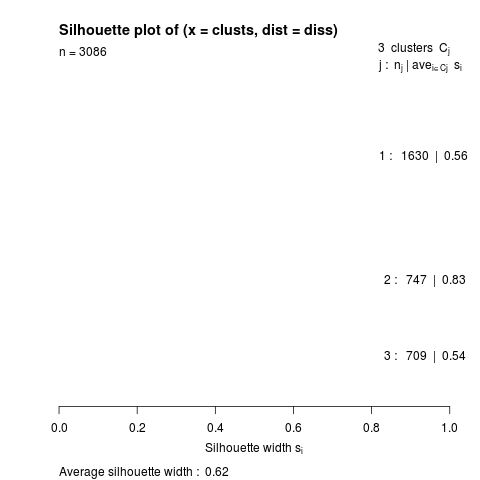

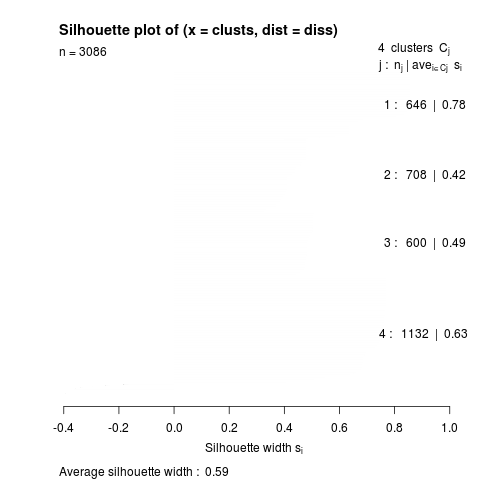

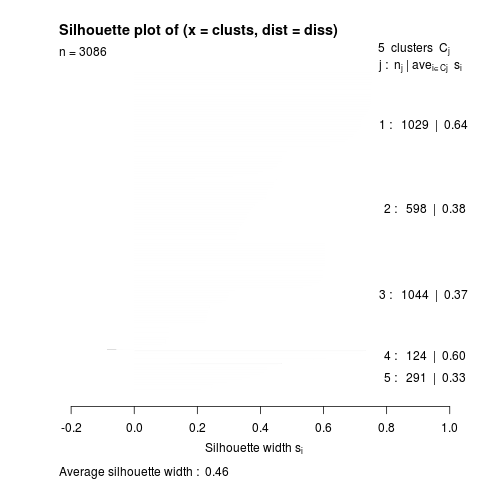

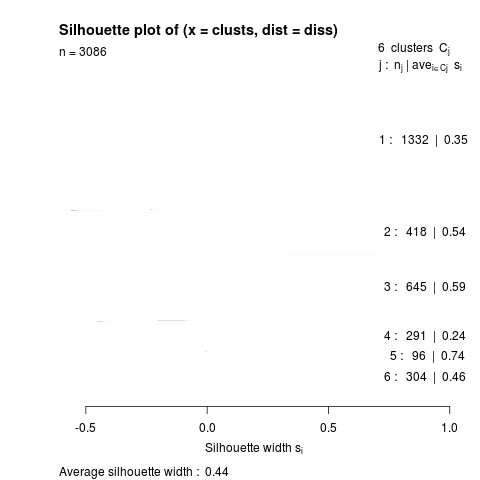

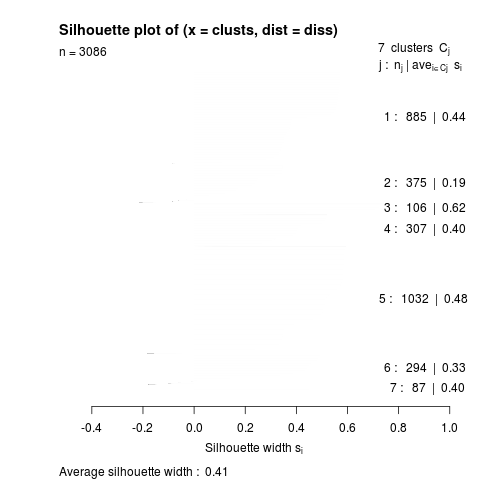

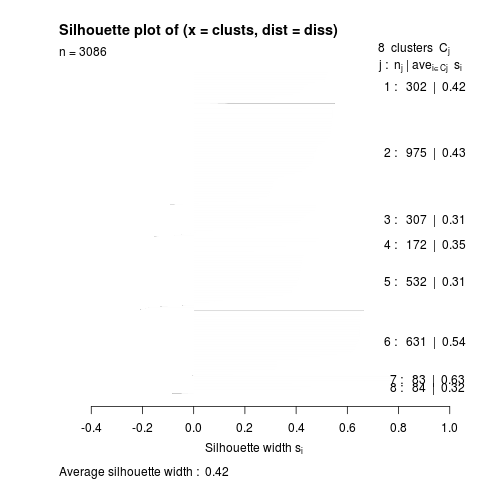

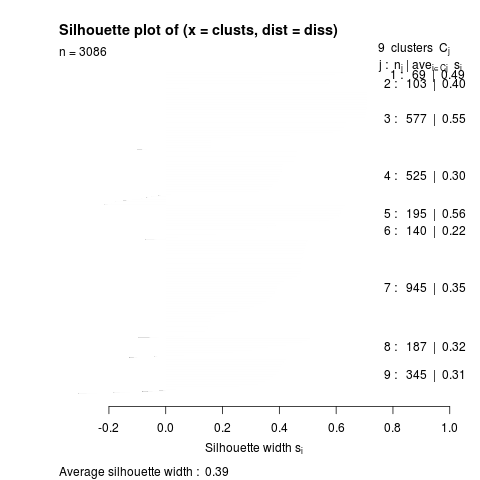

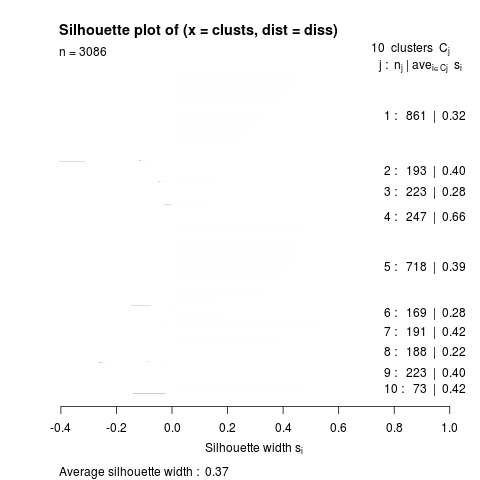

In [50]:
%%R

for (i in 2:10){
    sc3_plot_silhouette(P, k = i)
}

###LVM1

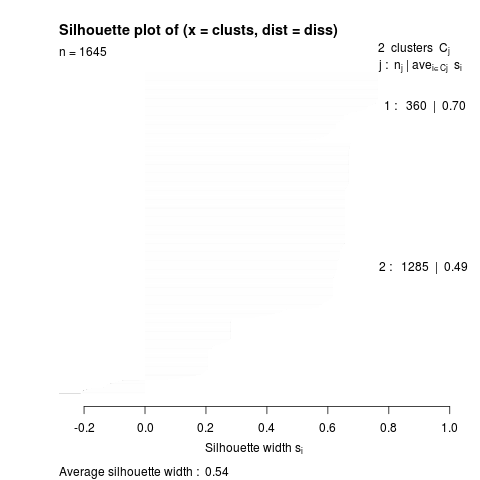

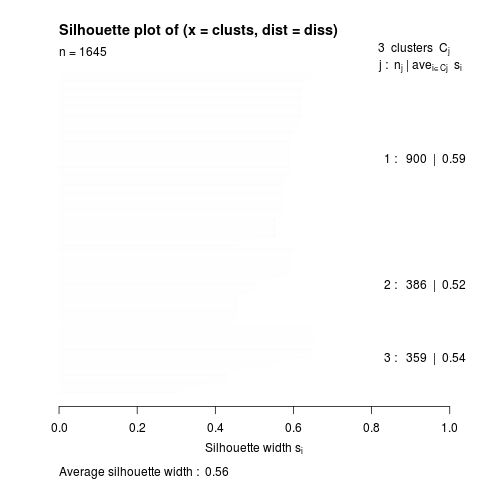

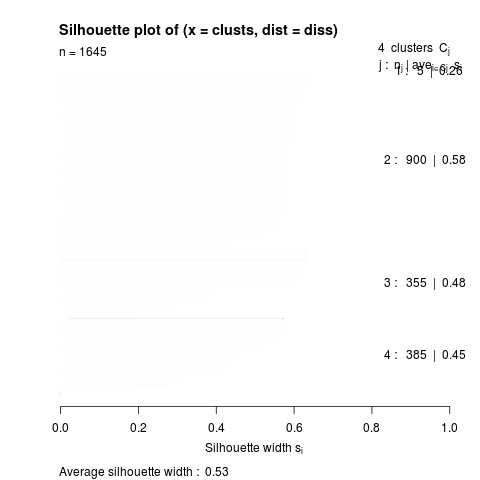

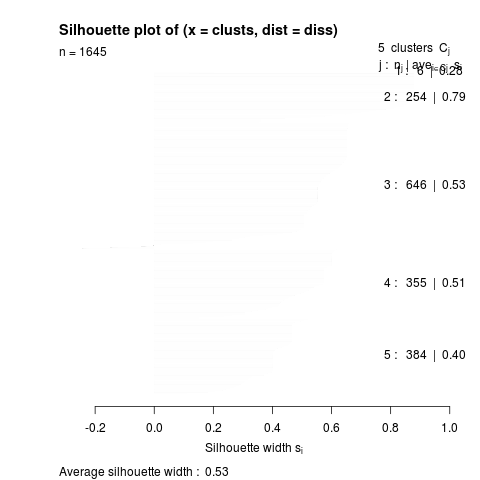

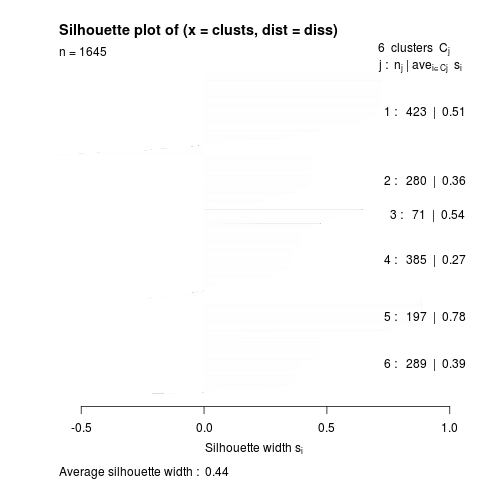

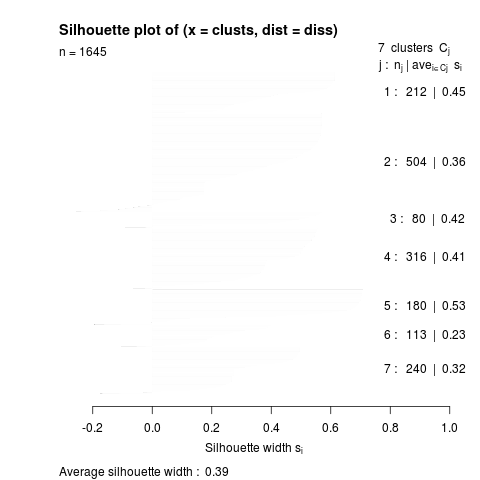

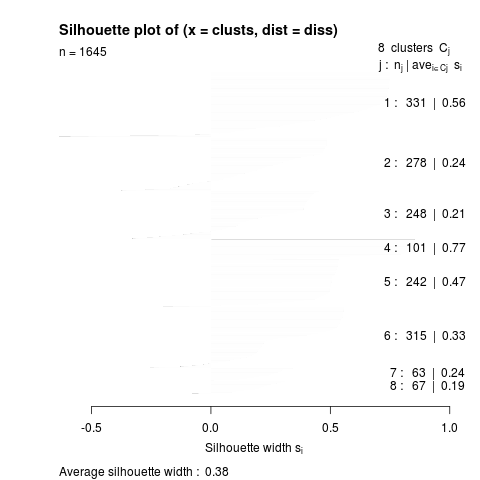

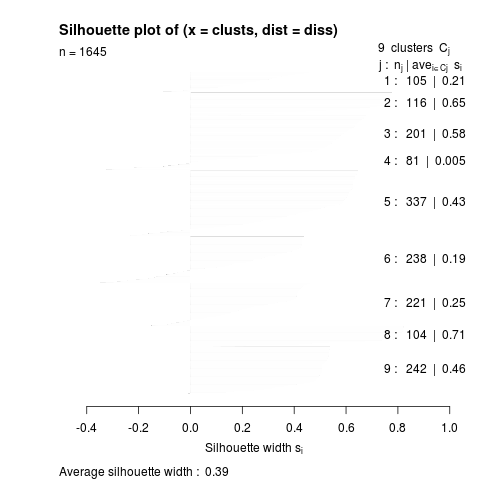

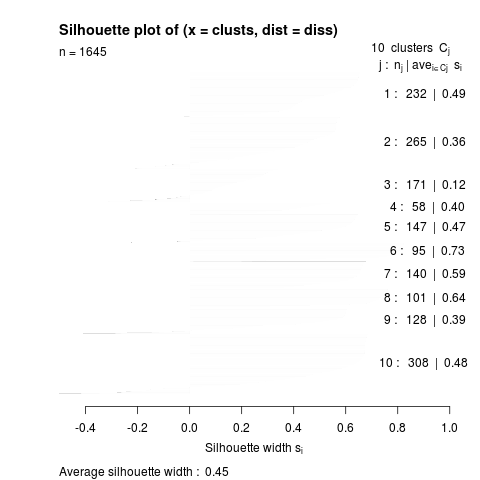

In [51]:
%%R

for (i in 2:10){
    sc3_plot_silhouette(LVM1, k = i)
}    

###LVM2

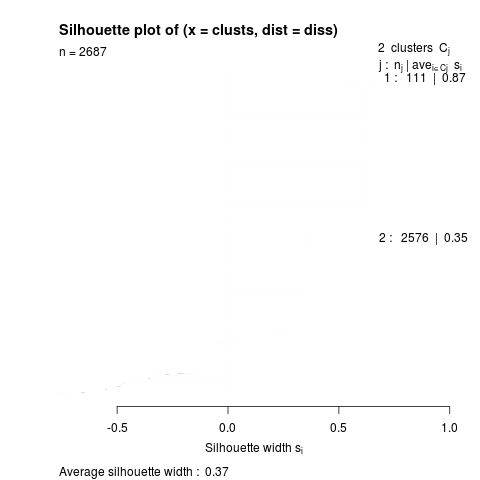

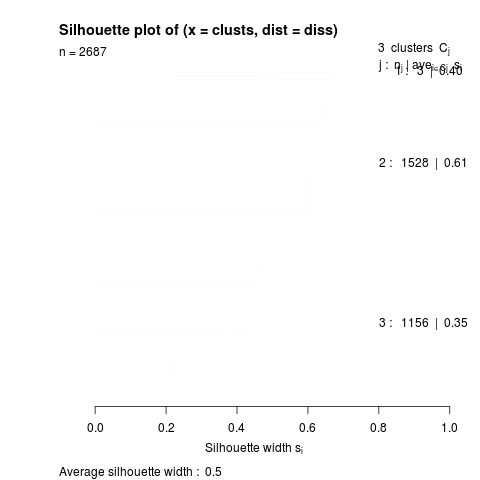

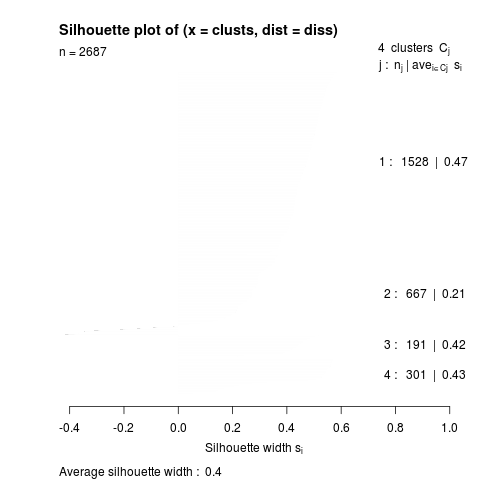

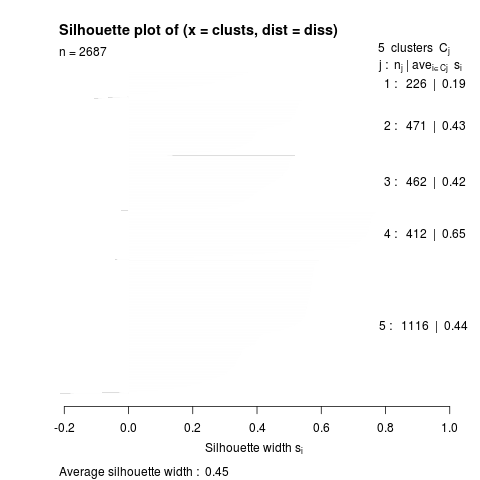

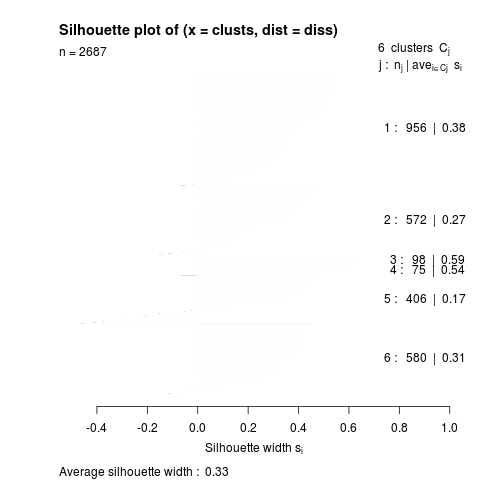

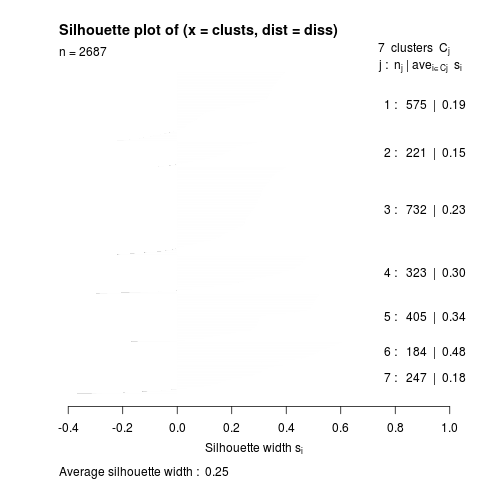

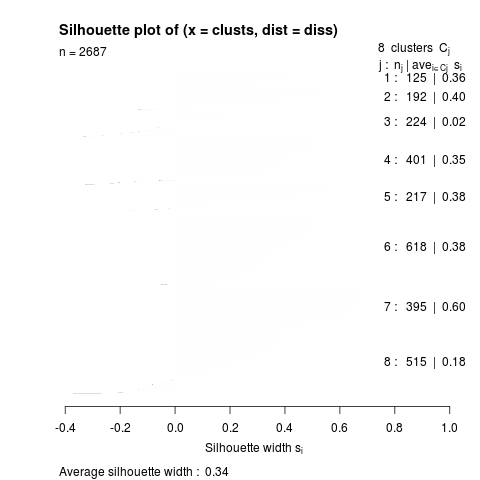

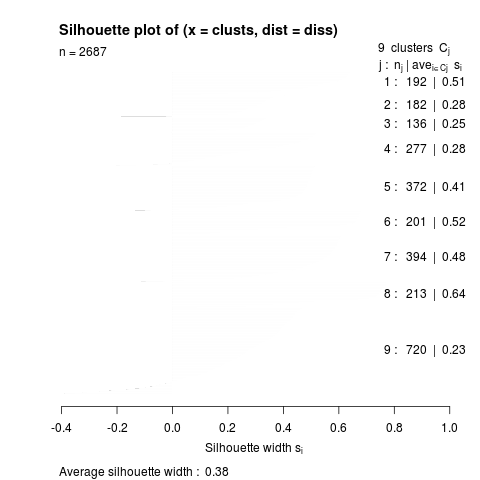

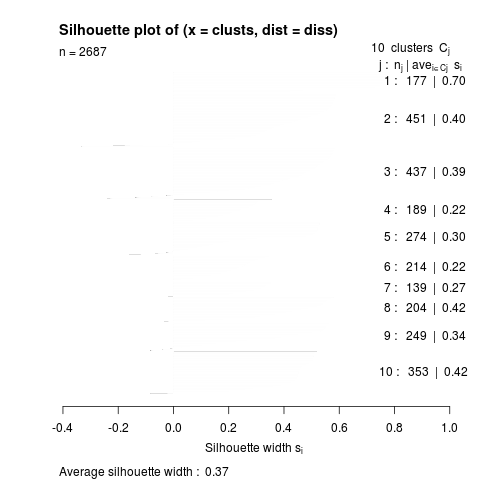

In [52]:
%%R

for (i in 2:10){
    sc3_plot_silhouette(LVM2, k = i)
}

save files

In [ ]:
###save files
saveRDS(P, file = "scater/separately_clustered/sc3_clustered_P_vis.rds")
saveRDS(LVM1, file = "scater/separately_clustered/sc3_clustered_LVM1_vis.rds")
saveRDS(LVM2, file = "scater/separately_clustered/sc3_clustered_LVM2_vis.rds")